In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import linprog

Решение не найдено. Проверьте условия задачи.


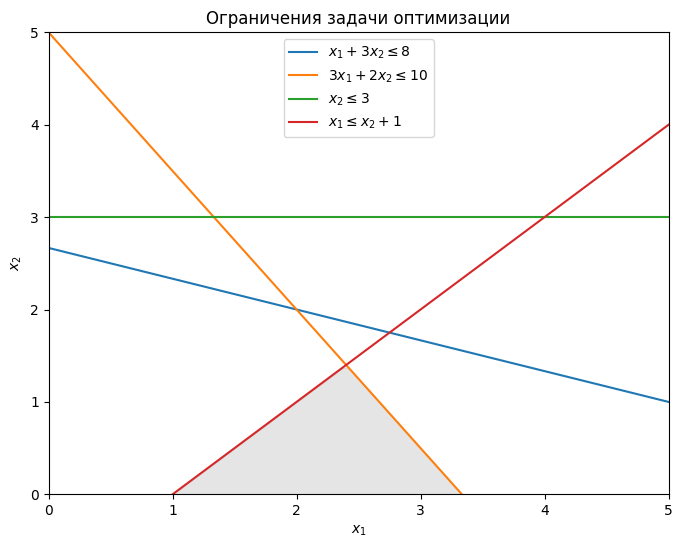

In [4]:
# Целевая функция
c = [-2, -4]

# Ограничения
A = [[1, 3], [3, 2], [0, -1], [-1, 1]]
b = [8, 10, -3, -1]

# Границы переменных
x0_bounds = (0, None)
x1_bounds = (0, None)

# Решение задачи линейного программирования
res = linprog(c, A_ub=A, b_ub=b, bounds=[x0_bounds, x1_bounds], method='highs')

# Отображение результатов
if res.success:
    print("Оптимальные значения переменных x1 и x2:", res.x)
    print("Максимальный доход:", -res.fun)
else:
    print("Решение не найдено. Проверьте условия задачи.")

# Визуализация ограничений
x1_values = np.linspace(0, 5, 100)
x2_values_1 = (8 - x1_values) / 3
x2_values_2 = (10 - 3 * x1_values) / 2
x2_values_3 = np.ones_like(x1_values) * 3
x2_values_4 = x1_values - 1

plt.figure(figsize=(8, 6))
plt.plot(x1_values, x2_values_1, label=r'$x_1 + 3x_2 \leq 8$')
plt.plot(x1_values, x2_values_2, label=r'$3x_1 + 2x_2 \leq 10$')
plt.plot(x1_values, x2_values_3, label=r'$x_2 \leq 3$')
plt.plot(x1_values, x2_values_4, label=r'$x_1 \leq x_2 + 1$')
plt.fill_between(x1_values, 0, np.minimum(x2_values_1, np.minimum(x2_values_2, np.minimum(x2_values_3, x2_values_4))),
                 alpha=0.2, color='gray')
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('Ограничения задачи оптимизации')
plt.legend()
plt.show()

Решение не найдено. Проверьте условия задачи.


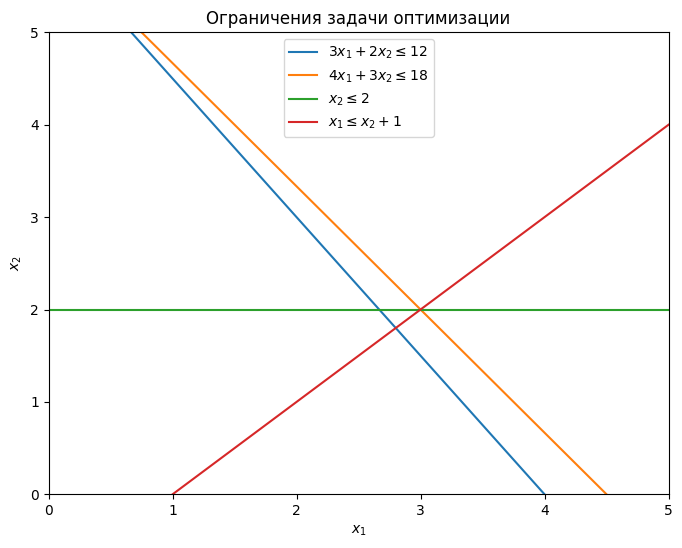

In [46]:
# Целевая функция
c = [-6, -8]

# Ограничения
A = [[3, 2], [4, 3], [0, -1], [-1, 1]]
b = [12, 18, -2, -1]

# Границы переменных
x0_bounds = (0, None)
x1_bounds = (0, None)

# Решение задачи линейного программирования
res = linprog(c, A_ub=A, b_ub=b, bounds=[x0_bounds, x1_bounds], method='highs')

# Отображение результатов
if res.success:
    print("Оптимальные значения переменных x1 и x2:", res.x)
    print("Максимальный доход:", -res.fun)
else:
    print("Решение не найдено. Проверьте условия задачи.")

# Визуализация ограничений
x1_values = np.linspace(0, 5, 100)
x2_values_1 = (12 - 3 * x1_values) / 2
x2_values_2 = (18 - 4 * x1_values) / 3
x2_values_3 = np.ones_like(x1_values) * 2
x2_values_4 = x1_values - 1

plt.figure(figsize=(8, 6))
plt.plot(x1_values, x2_values_1, label=r'$3x_1 + 2x_2 \leq 12$')
plt.plot(x1_values, x2_values_2, label=r'$4x_1 + 3x_2 \leq 18$')
plt.plot(x1_values, x2_values_3, label=r'$x_2 \leq 2$')
plt.plot(x1_values, x2_values_4, label=r'$x_1 \leq x_2 + 1$')

plt.xlim(0, 5)
plt.ylim(0, 5)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('Ограничения задачи оптимизации')
plt.legend()
plt.show()

In [14]:
from pulp import *
import time

start = time.time()
x1 = pulp.LpVariable("x1", lowBound=0)
x2 = pulp.LpVariable("x2", lowBound=0)
problem = pulp.LpProblem('0', LpMaximize)
problem += 30 * x1 + x2, "Функция цели"
problem += 90 * x1 + 5 * x2 <= 10000, "1"
problem += x2 == 3 * x1, "2"
problem.solve()
print("Результат:")
for variable in problem.variables():
    print(variable.name, "=", variable.varValue)
print("Прибыль:")
print(value(problem.objective))
stop = time.time()
print("Время :")
print(stop - start)

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/falser/study/jupiter/venv/lib/python3.11/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/14835beed2f24d2aaefb0ff6f19794ed-pulp.mps max timeMode elapsed branch printingOptions all solution /tmp/14835beed2f24d2aaefb0ff6f19794ed-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 7 COLUMNS
At line 14 RHS
At line 17 BOUNDS
At line 18 ENDATA
Problem MODEL has 2 rows, 2 columns and 4 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 0 (-2) rows, 0 (-2) columns and 0 (-4) elements
Empty problem - 0 rows, 0 columns and 0 elements
Optimal - objective value 3142.8571
After Postsolve, objective 3142.8571, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 3142.857143 - 0 iterations time 0.002, Presolve 0.00
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock

In [88]:
from cvxopt.modeling import variable, op

x = variable(2, 'x')
y = -(6 * x[0] + 8 * x[1])  # Функция цели
mass1 = (3 * x[0] + 2 * x[1] <= 12)  # 1
mass2 = (4 * x[0] + 3 * x[1] <= 18)  # 2
mass3 = (x[1] <= 2)  # 2
mass4 = (x[0] <= x[1] + 1)  # 2
x_non_negative = (x >= 0)  # 3 
problem = op(y, [mass1, mass2, mass3, mass4, x_non_negative])
problem.solve(solver='glpk')
print(f"--- Результат: {problem.objective.value()[0]:.2f}")
print(f"--- x1={x.value[0]:.2f}, x2={x.value[1]:.2f}")

GLPK Simplex Optimizer 5.0
6 rows, 2 columns, 9 non-zeros
*     0: obj =   0.000000000e+00 inf =   0.000e+00 (2)
*     2: obj =  -3.200000000e+01 inf =   0.000e+00 (0)
OPTIMAL LP SOLUTION FOUND
--- Результат: -32.00
--- x1=2.67, x2=2.00
